# Cubic spline interpolation with `PyDynamic.uncertainty.interpolate.interp1d_unc`

Interpolate a non-equidistant sine signal using cubic / bspline method with uncertainty propagation. Comparing the resulting uncertainties to a Monte-Carlo experiment yields good overlap.

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from PyDynamic.uncertainty.interpolate import interp1d_unc
from scipy.interpolate import interp1d

## Create non-equidistant sine-signal

In [33]:
n_nodes = 10
t = np.cumsum(0.5 * (1 + np.random.random(n_nodes)))
x = np.sin(t)
ux = np.full_like(x, 0.2)
t, x , ux

(array([0.6540325 , 1.24183562, 2.0329913 , 3.01636445, 3.54239847,
        4.3454792 , 4.92802502, 5.61033752, 6.3050748 , 7.28376322]),
 array([ 0.60839168,  0.94637861,  0.89507589,  0.12490115, -0.39016042,
        -0.93344036, -0.9768405 , -0.62321562,  0.02188775,  0.84178309]),
 array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]))

## Interpolate with PyDynamic

In [34]:
ti = np.linspace(np.min(t), np.max(t), 60, endpoint=False)
ti, xi, uxi = interp1d_unc(ti, t, x, ux, kind="cubic")
ti, xi, uxi

(array([0.6540325 , 0.76452801, 0.87502352, 0.98551903, 1.09601455,
        1.20651006, 1.31700557, 1.42750108, 1.53799659, 1.64849211,
        1.75898762, 1.86948313, 1.97997864, 2.09047415, 2.20096967,
        2.31146518, 2.42196069, 2.5324562 , 2.64295171, 2.75344723,
        2.86394274, 2.97443825, 3.08493376, 3.19542927, 3.30592479,
        3.4164203 , 3.52691581, 3.63741132, 3.74790683, 3.85840235,
        3.96889786, 4.07939337, 4.18988888, 4.30038439, 4.41087991,
        4.52137542, 4.63187093, 4.74236644, 4.85286195, 4.96335747,
        5.07385298, 5.18434849, 5.294844  , 5.40533951, 5.51583503,
        5.62633054, 5.73682605, 5.84732156, 5.95781707, 6.06831259,
        6.1788081 , 6.28930361, 6.39979912, 6.51029463, 6.62079015,
        6.73128566, 6.84178117, 6.95227668, 7.06277219, 7.17326771]),
 array([ 0.60839168,  0.69578865,  0.77221927,  0.83760976,  0.89188632,
         0.93497518,  0.96680255,  0.98729464,  0.99637767,  0.99397785,
         0.9800214 ,  0.95443454,  0

## Interpolate with Monte Carlo

In [35]:
X_mc = []
for i in range(2000):
    interp_x = interp1d(t, x + ux * np.random.randn(len(x)), kind="cubic")
    xm = interp_x(ti)
    X_mc.append(xm)
x_mc = np.mean(X_mc, axis=0)
ux_mc = np.std(X_mc, axis=0)
x_mc, ux

(array([ 0.6058117 ,  0.69802233,  0.77760947,  0.84471722,  0.89948967,
         0.94207091,  0.97260503,  0.99123613,  0.9981083 ,  0.99336564,
         0.97715223,  0.94961218,  0.91088957,  0.86114771,  0.80095263,
         0.73125233,  0.6530099 ,  0.56718843,  0.47475101,  0.37666073,
         0.27388068,  0.16737394,  0.05813067, -0.05248528, -0.16283753,
        -0.27128353, -0.37618072, -0.47597018, -0.56960471, -0.65623061,
        -0.73499454, -0.80504315, -0.86552309, -0.91558102, -0.95438732,
        -0.98147891, -0.99668093, -0.99982635, -0.99074808, -0.96928427,
        -0.93561658, -0.89047896, -0.83465519, -0.76892907, -0.69408441,
        -0.61090523, -0.52028878, -0.42342775, -0.32156243, -0.21593311,
        -0.1077801 ,  0.00165633,  0.11113587,  0.21941824,  0.32526314,
         0.42743028,  0.52467937,  0.61577011,  0.69946222,  0.7745154 ]),
 array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]))

In [36]:
np.max(t)

7.283763217162846

## Compare results

### Visual

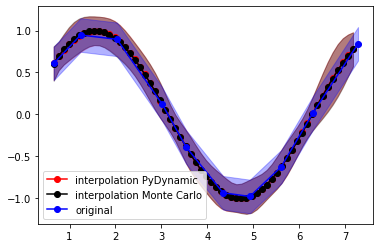

In [37]:
# interpolated signal
plt.plot(ti, xi, "-or", label="interpolation PyDynamic")
plt.fill_between(ti, xi + uxi, xi - uxi, color="r", alpha=0.3)
# interpolated signal
plt.plot(ti, x_mc, "-ok", label="interpolation Monte Carlo")
plt.fill_between(ti, x_mc + ux_mc, x_mc - ux_mc, color="k", alpha=0.3)
# original signal
plt.plot(t, x, "-ob", label="original")
plt.fill_between(t, x + ux, x - ux, color="b", alpha=0.3)

plt.legend()

### Numerical

In [118]:
np.allclose(xi, x_mc, atol=1e-2, rtol=1e-2)

True

In [43]:
np.allclose(uxi, ux_mc, atol=1e-2, rtol=1e-2)

True